In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('housing.csv')
x = df.drop(["median_house_value"],axis=1)
y = df['median_house_value']
# x.columns
x = pd.get_dummies(x,columns=["ocean_proximity"])
# print(x.dtypes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor = Ridge()

In [45]:
parameters = {'alpha':[0.01, 0.1, 1, 10, 100]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(x_train_scaled, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.01, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [46]:
print(ridgecv.best_params_)

{'alpha': 10}


In [47]:
ridge_pred = ridgecv.predict(x_test_scaled)

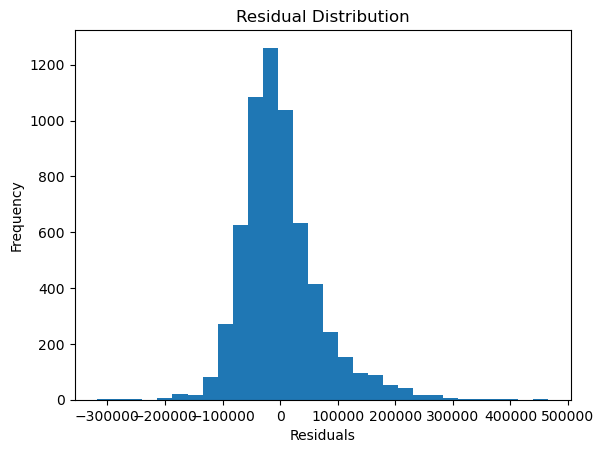

In [48]:
#visualization
residuals = y_test - ridge_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [49]:
# R2 Score of the model
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
score

0.6397684336089735